# Exploring textbooks questions

## imports

In [1]:
%%capture
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from collections import Counter, defaultdict
%load_ext autoreload
%autoreload 2

In [35]:
%%capture
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pylab as plt
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light default
plt.rcParams['figure.figsize'] = (16.0, 10.0)

In [6]:
import pdfextraction.hierarchy_exctraction as hext
import pdfextraction.amt_boto_modules as amt

## Setting up paths and loading data

In [244]:
# data_pickled_dir = './store_hit_results_metadata/question_anno/group_latest_combined/' 
data_pickled_dir = './store_hit_results_metadata/question_anno/group_2/' 

In [245]:
base_path = 'ai2-vision-turk-data/textbook-annotation-test/labeled-questions/'
test_path = 'ai2-vision-turk-data/textbook-annotation-test/hierarchy-ext-test/'

In [248]:
combined_results_df = pd.read_pickle(data_pickled_dir + 'complete_df.pkl')
combined_consensus_df = pd.read_pickle(data_pickled_dir + 'consensus_df.pkl')
# combined_consensus_with_workerid_df = pd.read_pickle(data_pickled_dir + 'consensus_df_w_workers.pkl') 

1) question type hist

2) what cats turkers do well on 

3) total questions 

In [13]:
book_breakdowns, page_ranges = amt.load_book_info()

In [223]:
bad_questions_df = combined_consensus_df.query('category == "No Consensus" or group_n == "No Consensus"')

In [225]:
bad_pages = pd.unique(bad_questions_df['page'])

consensus_only_df = combined_consensus_df[~combined_consensus_df['page'].isin(bad_pages)]
verified_pages_minus_bad = pd.unique(consensus_only_df['page']).tolist()
pd.unique(consensus_only_df['page']).shape

(468,)

In [208]:
# accuracy_total, errors_total, box_totals, ind_page_results = hext.predict_and_verify_groups(verified_pages_minus_bad, base_path)

## Question category breakdown

In [207]:
q_only_df = consensus_only_df[consensus_only_df['group_n'] != '0']

In [250]:
combined_consensus_df['category'].value_counts()

Multiple Choice      4012
Short Answer         2637
unlabeled            2144
True/False            982
Question              954
Fill-in-the-Blank     952
No Consensus          227
Discussion            177
Definition            171
Figure Label           68
Header/Topic           62
Unlabeled              48
Answer                 11
Name: category, dtype: int64

In [227]:
bad_questions_df['category'].value_counts()

No Consensus         1503
Fill-in-the-Blank     311
Multiple Choice       225
Short Answer          177
Unlabeled             106
True/False             87
Name: category, dtype: int64

In [44]:
q_counts = q_only_df['category'].value_counts()

In [251]:
cat_counts = combined_consensus_df['category'].value_counts()

In [267]:
q_counts

Fill-in-the-Blank    2118
Multiple Choice      1035
Short Answer          898
True/False            553
Unlabeled             170
Name: category, dtype: int64

In [270]:
q_only_counts = cat_counts[cat_counts.index[0:2] + cat_counts.index[4:6]]
q_only_counts

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: using '+' to provide set union with Indexes is deprecated, use '|' or .union()
  if __name__ == '__main__':


Fill-in-the-Blank     952
Multiple Choice      4012
Question              954
Short Answer         2637
Name: category, dtype: int64

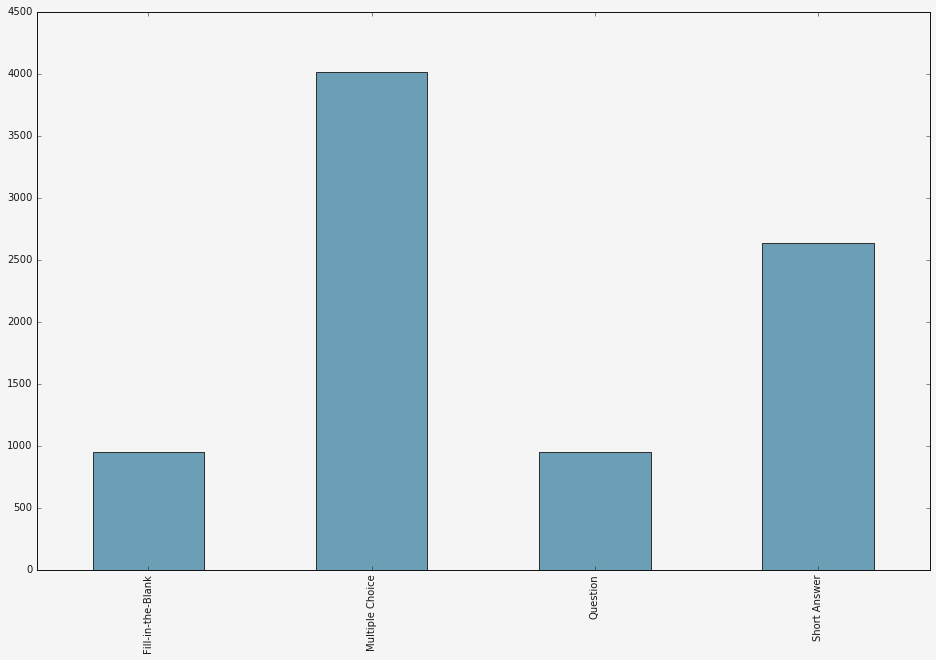

In [272]:
_ = q_only_counts.plot.bar()

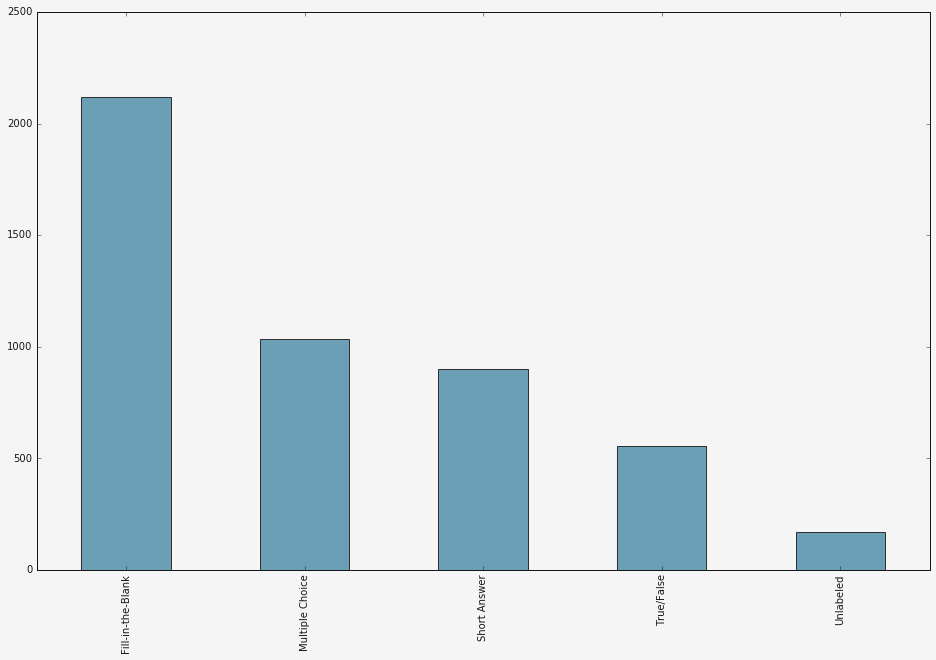

In [271]:
_ = q_counts.plot.bar()

In [67]:
gbqg = q_only_df.groupby(['page', 'group_n'])['category']

In [82]:
q_only_df

,page,box_id,category,hit_id,group_n
20,Daily_Science_Grade_1_Evan_Moor_100.jpeg,Q11,Fill-in-the-Blank,3VDVA3ILIDG3ODEZECC2QGUXV88G1P,1
21,Daily_Science_Grade_1_Evan_Moor_100.jpeg,Q13,Fill-in-the-Blank,3VDVA3ILIDG3ODEZECC2QGUXV88G1P,1
22,Daily_Science_Grade_1_Evan_Moor_100.jpeg,Q14,Fill-in-the-Blank,3VDVA3ILIDG3ODEZECC2QGUXV88G1P,1
23,Daily_Science_Grade_1_Evan_Moor_100.jpeg,Q15,Fill-in-the-Blank,3VDVA3ILIDG3ODEZECC2QGUXV88G1P,1
24,Daily_Science_Grade_1_Evan_Moor_100.jpeg,Q16,Fill-in-the-Blank,3VDVA3ILIDG3ODEZECC2QGUXV88G1P,1
44,Daily_Science_Grade_1_Evan_Moor_101.jpeg,Q10,Fill-in-the-Blank,34HEO7RUG6VQ7R0DQ6Z70L171BPAR3,1
46,Daily_Science_Grade_1_Evan_Moor_101.jpeg,Q13,Multiple Choice,34HEO7RUG6VQ7R0DQ6Z70L171BPAR3,2
47,Daily_Science_Grade_1_Evan_Moor_101.jpeg,Q14,Multiple Choice,34HEO7RUG6VQ7R0DQ6Z70L171BPAR3,2
48,Daily_Science_Grade_1_Evan_Moor_101.jpeg,Q15,Multiple Choice,34HEO7RUG6VQ7R0DQ6Z70L171BPAR3,2
49,Daily_Science_Grade_1_Evan_Moor_101.jpeg,Q16,Multiple Choice,34HEO7RUG6VQ7R0DQ6Z70L171BPAR3,2


In [97]:
qtypes = gbqg.apply(pd.unique)

In [110]:
question_groups_by_cat = qtypes.value_counts()[:5]

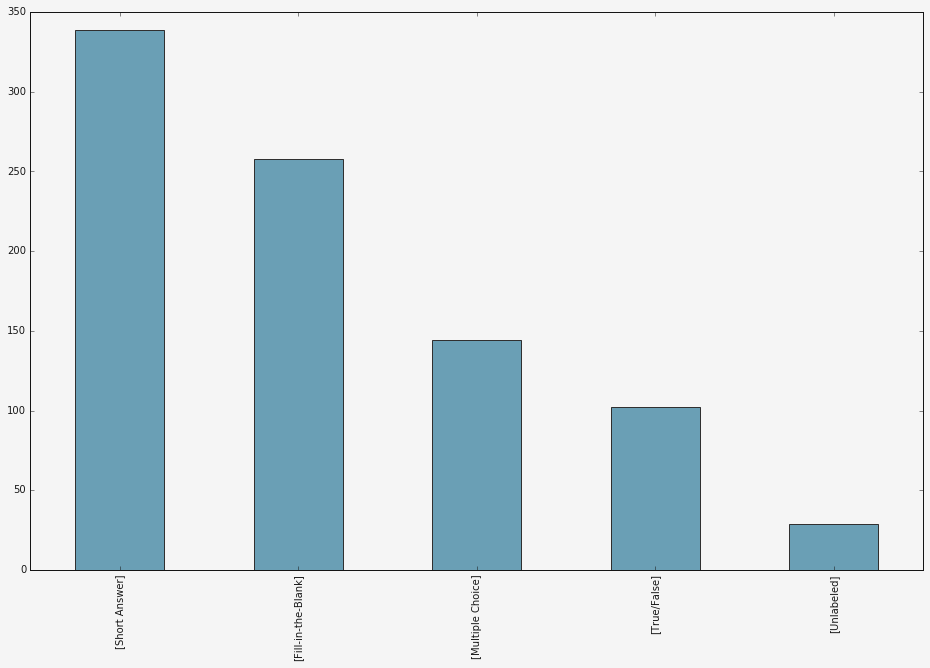

In [111]:
_ = question_groups_by_cat.plot.bar()

### looking at raw box counts per page

In [232]:
only_cat_group = q_only_df.groupby('category')['page'].apply(pd.value_counts)

In [236]:
only_cat_group.groupby(level=0).mean()

category
Fill-in-the-Blank     9.455357
Multiple Choice      13.441558
Short Answer          3.789030
True/False            5.760417
Unlabeled             5.000000
Name: page, dtype: float64

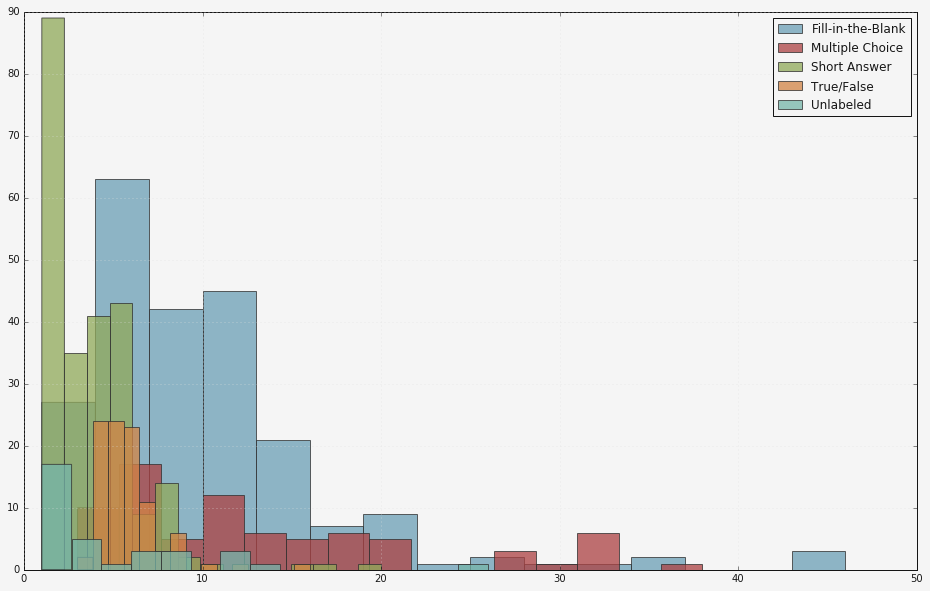

In [242]:
fig, ax = plt.subplots()
for g, counts in only_cat_group.groupby(level=0):
    _ = counts.hist(label=g, alpha=.75, ax=ax, bins = 15)
_ = ax.legend()

### looking at boxes per group by question type

In [240]:
gbcp = q_only_df.groupby(['category','group_n'])
cat_group_series = gbcp['page'].apply(pd.value_counts)
cgs = cat_group_series.groupby(level=0)

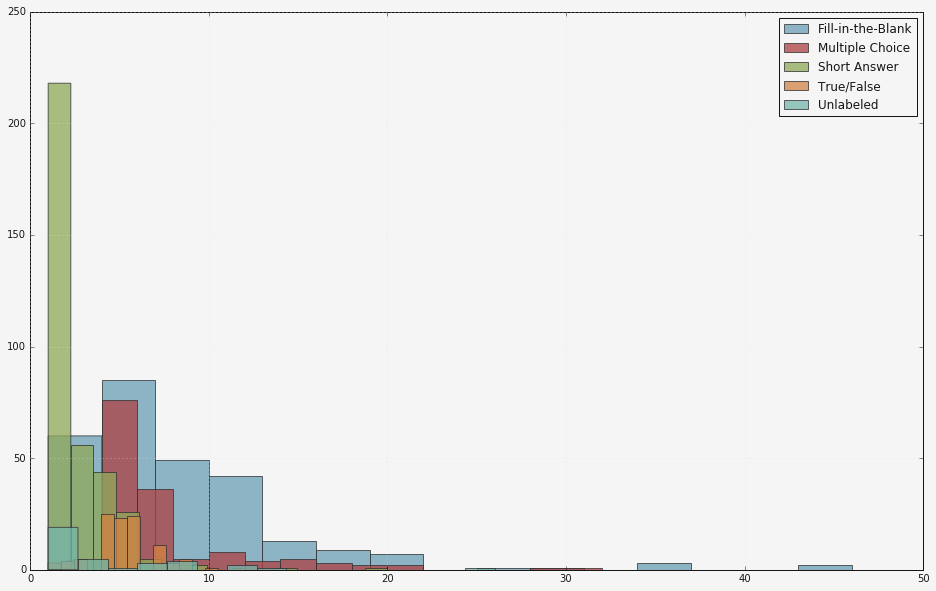

In [241]:
fig, ax = plt.subplots()
for g, counts in cgs:
    _ = counts.hist(label=g, alpha=.75, ax=ax, bins = 15)
_ = ax.legend()

In [187]:
cgs.median()

category
Fill-in-the-Blank    6
Multiple Choice      5
Short Answer         2
True/False           5
Unlabeled            2
Name: page, dtype: int64

## Predicting all group numbers

In [218]:
raw_question_dir = 'ai2-vision-turk-data/textbook-annotation-test/annotations-w-questions/'

In [214]:
page_n = 40

In [215]:
page_n += 1
print page_n
single_page = ['Daily_Science_Grade_2_Evan_Moor_' + str(page_n) +'.jpeg']

41


In [243]:
# hext.predict_groups(single_page, raw_question_dir)

# End